Amazon Customer Data

In [1]:
from zipfile import ZipFile
import pandas as pd

In [2]:
with ZipFile('amazon-employee-access-challenge.zip') as zip:
    zip.extractall()

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
cols = df.drop('ACTION', axis=1).columns

In [7]:
encoders = [LabelEncoder() for i in cols]

In [8]:
def label_encoder(n):
    encoded_data = encoders[n].fit_transform(df[cols[n]])
    return encoded_data

In [9]:
for i in range(len(cols)):
    df[cols[i]] = label_encoder(i)

In [10]:
df['ACTION'].value_counts()

ACTION
1    30872
0     1897
Name: count, dtype: int64

In [11]:
df.dtypes

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

In [12]:
def frequency_encoder(col):
    frequency = df[col].value_counts().reset_index()
    return pd.merge(df[[col]], frequency, how='left', on=col).iloc[:, -1].values

In [13]:
df['ROLE_ROLLUP_2'].value_counts()

ROLE_ROLLUP_2
64     4424
68     3945
66     2641
58     2547
71     1796
       ... 
164       1
175       1
151       1
161       1
166       1
Name: count, Length: 177, dtype: int64

In [14]:
for col in cols:
    df[col+'_counts'] = frequency_encoder(col)

In [15]:
df

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,RESOURCE_counts,MGR_ID_counts,ROLE_ROLLUP_1_counts,ROLE_ROLLUP_2_counts,ROLE_DEPTNAME_counts,ROLE_TITLE_counts,ROLE_FAMILY_DESC_counts,ROLE_FAMILY_counts,ROLE_CODE_counts
0,1,3050,3862,21,64,307,4,7,64,4,3,55,21407,4424,72,3583,6896,10980,3583
1,1,644,156,21,68,299,34,59,66,38,30,10,21407,3945,159,81,12,1287,81
2,1,2706,1533,50,57,14,0,2083,3,0,2,3,184,184,546,1256,33,2636,1256
3,1,2615,867,21,68,181,22,1901,64,23,1,62,21407,3945,190,4649,1244,10980,4649
4,1,3616,941,15,13,157,70,325,4,77,8,9,276,138,45,75,19,362,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32764,1,1060,1823,21,64,181,22,1901,64,23,51,29,21407,4424,190,4649,1244,10980,4649
32765,1,1162,4231,3,34,284,133,1449,61,142,2,9,721,721,54,24,5,224,24
32766,1,2390,2539,21,66,200,197,1144,20,207,161,5,21407,2641,42,3,2,78,3
32767,1,6082,3252,51,60,20,337,2146,65,71,7,16,275,257,659,394,244,1318,394


In [16]:
df.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE', 'RESOURCE_counts', 'MGR_ID_counts', 'ROLE_ROLLUP_1_counts',
       'ROLE_ROLLUP_2_counts', 'ROLE_DEPTNAME_counts', 'ROLE_TITLE_counts',
       'ROLE_FAMILY_DESC_counts', 'ROLE_FAMILY_counts', 'ROLE_CODE_counts'],
      dtype='object')

In [17]:
df.dtypes

ACTION                     int64
RESOURCE                   int64
MGR_ID                     int64
ROLE_ROLLUP_1              int64
ROLE_ROLLUP_2              int64
ROLE_DEPTNAME              int64
ROLE_TITLE                 int64
ROLE_FAMILY_DESC           int64
ROLE_FAMILY                int64
ROLE_CODE                  int64
RESOURCE_counts            int64
MGR_ID_counts              int64
ROLE_ROLLUP_1_counts       int64
ROLE_ROLLUP_2_counts       int64
ROLE_DEPTNAME_counts       int64
ROLE_TITLE_counts          int64
ROLE_FAMILY_DESC_counts    int64
ROLE_FAMILY_counts         int64
ROLE_CODE_counts           int64
dtype: object

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('ACTION', axis=1)
y = df['ACTION']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=44)

In [21]:
from tensorflow.keras.utils import normalize
X_train_normalized = normalize(X_train, axis=1)
X_val_normalized = normalize(X_val, axis=1)
X_test_normalized = normalize(X_test, axis=1)

In [22]:
import tensorflow as tf

In [23]:
input_len = len(X.columns)

In [24]:
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

In [25]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(input_len,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        10, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.01)),
    # BatchNormalization(),
    tf.keras.layers.Dense(
        5, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(
#     monitor='val_loss', patience=10, restore_best_weights=True)

In [27]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [28]:
from keras.losses import binary_crossentropy

In [29]:
model.compile(loss=binary_crossentropy, optimizer=optimizer,metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import CSVLogger
csv_logger = CSVLogger('training_log.csv', append=False)

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='./logs', histogram_freq=1)
model.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=10,
          batch_size=32,
          callbacks=[csv_logger])

Epoch 1/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9263 - loss: 346.0449 - val_accuracy: 0.8146 - val_loss: 27.6595
Epoch 2/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8754 - loss: 16.8285 - val_accuracy: 0.7685 - val_loss: 8.9764
Epoch 3/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8489 - loss: 7.4248 - val_accuracy: 0.9352 - val_loss: 4.6366
Epoch 4/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9057 - loss: 4.4492 - val_accuracy: 0.8020 - val_loss: 3.3028
Epoch 5/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9000 - loss: 2.9024 - val_accuracy: 0.9424 - val_loss: 4.3211
Epoch 6/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9003 - loss: 2.5080 - val_accuracy: 0.9422 - val_loss: 2.7879
Epoch 7/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9046 - loss: 2.0791 - val_accuracy: 0.9432 - val_loss: 3.2459
Epoch 8/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.9039 - loss: 1.6452 - val_accura

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 754 (2.95 KB)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 503 (1.97 KB)

In [33]:
import matplotlib.pyplot as plt

In [34]:
log_data = pd.read_csv('training_log.csv')
print(log_data.head())  # To view the columns


   epoch  accuracy        loss  val_accuracy   val_loss
0      0  0.913265  152.747742      0.814610  27.659523
1      1  0.867728   13.025864      0.768453   8.976421
2      2  0.866489    6.469042      0.935152   4.636566
3      3  0.899819    4.076996      0.802022   3.302753
4      4  0.900296    2.775188      0.942399   4.321067


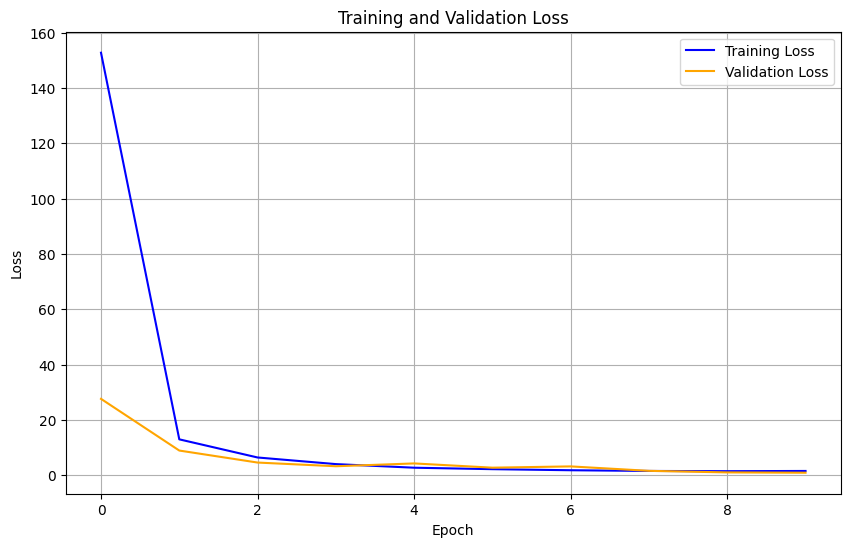

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(log_data['epoch'], log_data['loss'], label='Training Loss', color='blue')
plt.plot(log_data['epoch'], log_data['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


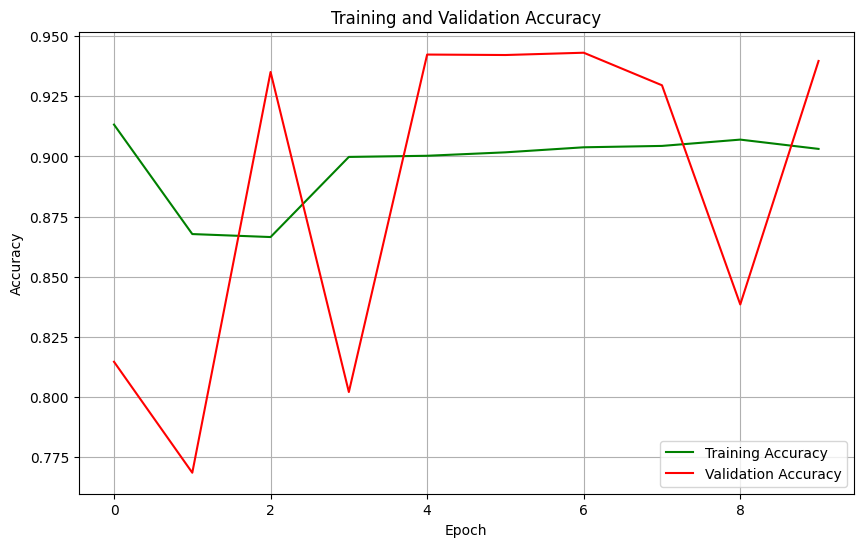

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(log_data['epoch'], log_data['accuracy'], label='Training Accuracy', color='green')
plt.plot(log_data['epoch'], log_data['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
